## Convert image to RGB matrix

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [12]:
from scipy.cluster.vq import whiten, kmeans, vq

In [121]:
image = img.imread('./data/sea.png')
image.shape

(376, 604, 3)

In [122]:
r, g, b = [], [], []

for row in image:
    for pixel in row:
        # a pixel contains RGB values
        r.append(temp_r * 255)
        g.append(temp_g * 255)
        b.append(temp_b * 255)

In [123]:
print(f"length of r: {len(r)}")
print(f"length of g: {len(g)}")
print(f"length of b: {len(b)}")

length of r: 227104
length of g: 227104
length of b: 227104


In [124]:
# dataframe with RGB values
pixels = pd.DataFrame({'red': r, 'blue': b, 'green': g})
pixels.head()

red  blue      green
0  22.000001  56.0  48.000001
1  22.000001  56.0  48.000001
2  22.000001  56.0  48.000001
3  22.000001  56.0  48.000001
4  22.000001  56.0  48.000001

In [125]:
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])

TypeError: 'numpy.float64' object does not support item assignment

In [63]:
from PIL import Image

In [64]:
sea = Image.open("./data/sea.png")
sea.show()

In [66]:
sea_arr = np.array(sea)
sea_arr.shape

(376, 604, 3)

In [96]:
red = np.ravel(sea_arr[:,:,0])
green = np.ravel(sea_arr[:,:,1])
blue = np.ravel(sea_arr[:,:,2])

In [113]:
df = pd.DataFrame({'red': red * 1.0, 'green': green * 1.0, 'blue': blue * 1.0})
df.head()

red  green   blue
0  230.0  230.0  230.0
1  230.0  230.0  230.0
2  230.0  230.0  230.0
3  230.0  230.0  230.0
4  230.0  230.0  230.0

In [114]:
df['scaled_red'] = whiten(df['red'])
df['scaled_green'] = whiten(df['green'])
df['scaled_blue'] = whiten(df['blue'])

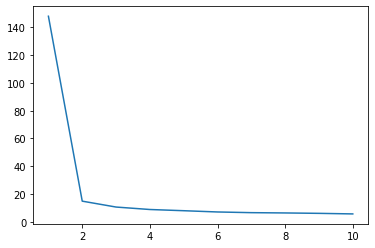

In [115]:
distortions = []
num_clusters = range(1, 11)

# create a list of distortions
for i in num_clusters:
    clst_centers, distortion = kmeans(df, i)
    distortions.append(distortion)

# lineplot
fig, ax = plt.subplots()
ax.plot(num_clusters, distortions)
plt.show()

In [103]:
df['scaled_red'][:10]

0    2.255245
1    2.255245
2    2.255245
3    2.255245
4    2.255245
5    2.255245
6    2.255245
7    2.255245
8    2.255245
9    2.255245
Name: scaled_red, dtype: float64

In [116]:
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

In [117]:
cluster_centers, _ = kmeans(df[['red', 'green', 'blue']], 3)
colors = []

for clst in cluster_centers:
    scaled_r, scaled_g, scaled_b = clst
    colors.append((
    scaled_r * r_std/255,
    scaled_g * g_std/255,
    scaled_b * b_std/255))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


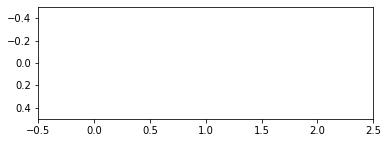

In [132]:
plt.imshow([colors])
plt.show()

In [119]:
colors[:10]

[(10.519366010446431, 27.134918746490364, 30.048490383924477),
 (91.09404817702935, 71.92491371816617, 65.99822581834881),
 (9.111077550161994, 17.68197287120771, 19.726533365207235)]